In [1]:
from quantum_electron import FullModel, PotentialVisualization, package_versions
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import elementary_charge as qe, epsilon_0 as eps0, electron_mass as me

package_versions()

quantum_electron 0.2.1
numpy 1.25.2
scipy 1.9.3
matplotlib 3.5.3


In this notebook we will show the elementary tools for working with electrostatic potential files. We'll use electrostatic potential data that was simulation in a separate notebook using the ZeroHeliumKit module. We can readily load the results with the `FieldAnalyzer` class. 

NOTE: Please make sure you have installed the `zeroheliumkit` module: https://github.com/eeroqlab/zeroheliumkit

In [3]:
from zeroheliumkit.fem import FieldAnalyzer

# Inspecting electrostatic potentials

We're going to load FEM data and inspect the electrostatic potentials. `phi.phi` contains the potential data. It is structured as follows: 

`potential_dict = {'electrode_name1' : 2D numpy array, 
  'electrode_name2' : 2D numpy array, 
   ...}`

We call these 2D arrays coupling constants, but in different areas of physics they're also knows as electrode lever arms. To construct a potential from the coupling constants, we sum each coupling constant 2D array weighted by the voltage applied to each electrode. 

The `voltage_dict` has a similar structure: 

`voltage_dict = {'electrode_name1' : float, 'electrode_name2' : float, ...}` 

and so on.

In [19]:
phi = FieldAnalyzer(("fem_data/long_channel.txt", 'phi', '2Dmap'))

potential_dict = phi.phi
channel_length = 50
micron = 1e-6

phi.phi.keys()

voltages = {'gnd' : -0.1, 
            'trench' : 0.8}

With the voltage and potential dictionaries defined we can construct our `PotentialVisualization` object, which has several useful methods:

In [20]:
p = PotentialVisualization(phi.phi, voltages)

First, we can easily plot the coupling constant arrays in a grid. This becomes very useful as the number of electrodes grow. 

{'gnd': 0.2815292011, 'trench': 0.7184772037}

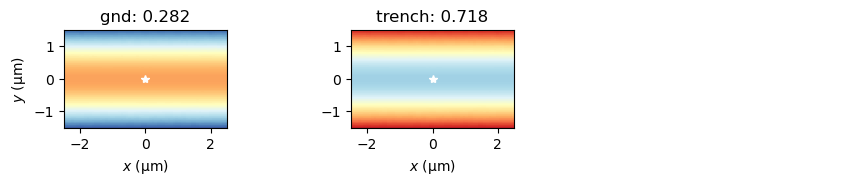

In [21]:
p.plot_coupling_constants(loc=(0, 0), plot_coor=(0, 0), plot_dxdy=(5, 3))

Note that calling `plot_coupling_constants` doesn't change the `voltage_dict` property of the class:

In [22]:
p.voltage_dict

{'gnd': -0.1, 'trench': 0.8}

We can now look at various electrostatic potentials generated by this voltage dictionary. Let's first plot the 2D map. We can control the center location using the `coor` argument, and `dxdy` controls the width and height of the plot.

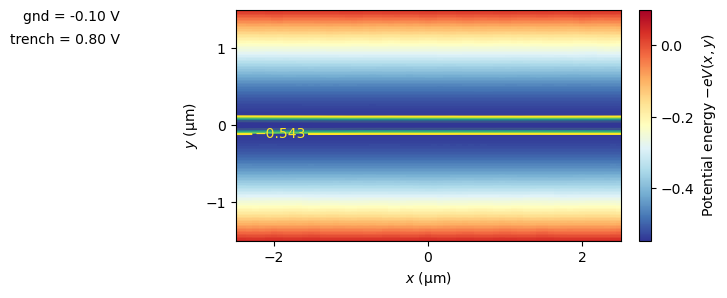

In [23]:
p.plot_potential_energy(coor=(0, 0), dxdy=(5, 3), figsize=(6, 3))

Slicing the potential is also easy. We can use `plot_potential_slice` to do this. To create a potential slice across the channel, we constrain the `x` argument to a list with just a single entry: 

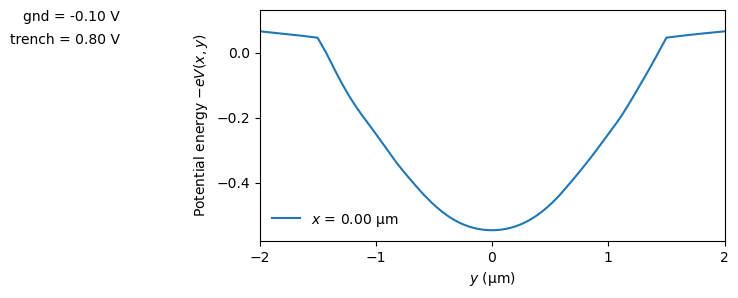

In [24]:
p.plot_potential_slice(x=[0], y=np.linspace(-2, 2))

Similarly, when slicing along the orthogonal direction we set `y` to be a list with a single entry.

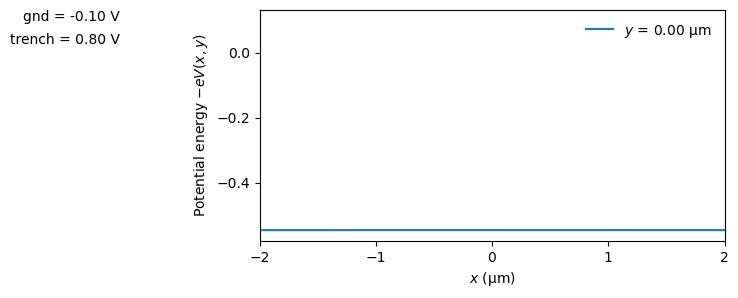

In [25]:
p.plot_potential_slice(y=[0], x=np.linspace(-2, 2))